# Analiza danych

## Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.data import loadlocal_mnist

## Konfiguracja

In [2]:
class config:
    
    # Data files paths
    DOWNLOADED_IMAGES_PATH = "data/t10k-images.idx3-ubyte"
    DOWNLOADED_LABELS_PATH = "data/t10k-labels.idx1-ubyte"

## Wczytanie danych

<a href="https://www.kaggle.com/datasets/hojjatk/mnist-dataset/data"><img src="images/site-logo.svg" width=500px></a>

<!-- [MNIST Dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset/data) -->

In [3]:
# Wczytanie danych MNIST
X, y = loadlocal_mnist(
    images_path=config.DOWNLOADED_IMAGES_PATH,
    labels_path=config.DOWNLOADED_LABELS_PATH
)

# Generowanie nazw kolumn
pixel_columns = [f"pixel{i}" for i in range(len(X[0]))]

# Tworzenie DataFrame z pandas
df = pd.DataFrame(X, columns=pixel_columns)

# Dodanie kolumny z wartością oczekiwaną
df["label"] = y

# Wyświetlenie danych
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


## Dane MNIST

In [4]:
# Identyfikator obrazka
image_id = 1598

# Tworzenie dwuwymiarowej tablicy pikseli
pixels = df.loc[image_id, df.columns != "label"].values
pixels = pixels.reshape(28, 28)

# Cyfra, którą obrazek przedstawia
value = df.loc[image_id, "label"]

# Wypisanie dwuwymiarowej tablicy pikseli oraz wartości cyfry
np.set_printoptions(linewidth=500)

print(f"Image value: {value}")
print(pixels)

Image value: 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  36  15  43  43 130 148 104 148 148 236 193 113  96 148  25   0   0]
 [  0   0   0   0   0   0   0   0   0   0 106 243 211 252 252 252 253 252 252 252 252 253 252 252 231  72   0   0]
 [  0   0   0   0   0   0   0   0  20 197 241 253 252 252 252 252 253 252 252 252 252 241 231 178 121  18   0   0]
 [  0   0   0   0   0   0   0  22 202 252 252 253 252 221 189 189

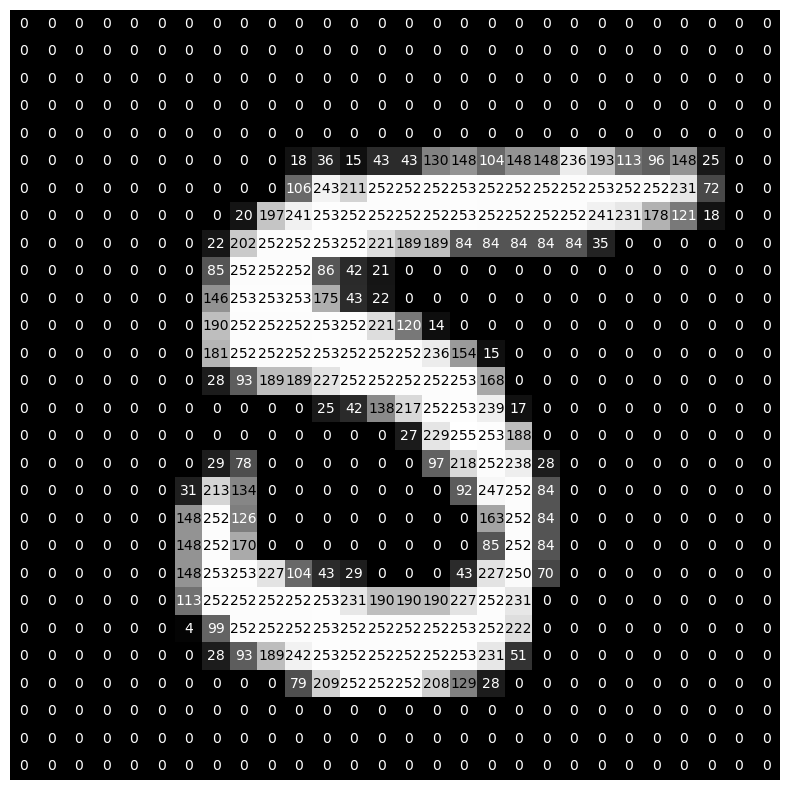

In [5]:
# Ustawienie rozmiaru obrazka
plt.figure(figsize=(10, 10))

# Dodanie do każdego piksela tekstu z jego wartością
for r in range(28):
    for c in range(28):
        plt.text(c, r, pixels[r, c],
            color=("white" if pixels[r, c] < 128 else "black"),
            ha="center", va="center")

# Wyświetlenie obrazka
plt.axis("off")
plt.imshow(pixels, cmap=plt.get_cmap("gray"))

In [6]:
# Wczytanie paru elementów z dataframe
df_2 = df.groupby(["label"]).sample(n=10, random_state=1).reset_index(drop=True)

df_2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


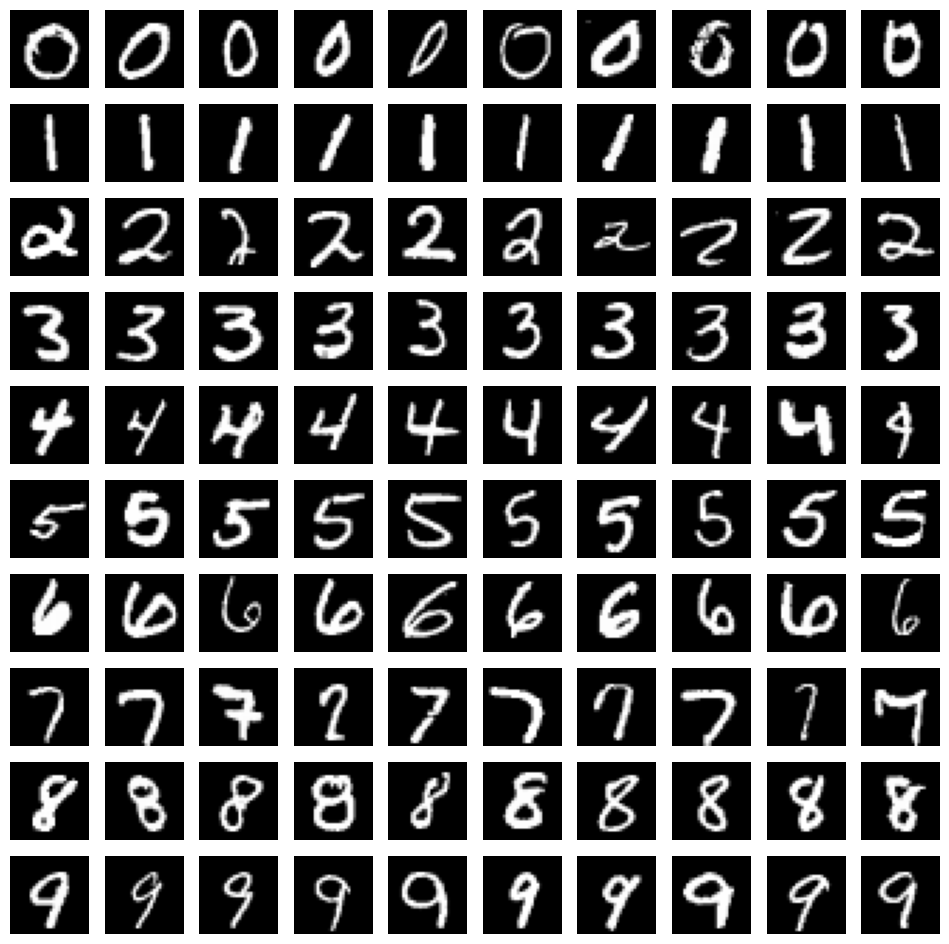

In [7]:
# Ustawienie rozmiaru ekranu, na którym wyświetlą się obrazki
fig = plt.figure(figsize=(12, 12))

# Liczba kolumn
columns = 10

# Przejście pętlami po cyfrach
for r in range(10):
    for c in range(columns):

        # Obliczenie id obrazka
        image_id = r * columns + c

        # Wczytanie pikseli obrazka
        pixels = df_2.loc[image_id, df.columns != "label"].values
        pixels = pixels.reshape(28, 28)

        # Wygenerowanie obrazka
        fig.add_subplot(10, columns, image_id + 1)
        plt.axis("off")
        plt.imshow(pixels, cmap=plt.get_cmap("gray"))

# Wyświetlenie obrazków
plt.show()